# Pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

## Introducing Pandas objects

We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, axis labeling, and alignment apply across all of the objects. To get started, import NumPy and load pandas into your namespace:

In [1]:
import numpy as np
import pandas as pd

### Series

`Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a `Series` is to call:

```py
s = pd.Series(data, index=index)
```

Here, `data` can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)


The passed **index** is a list of axis labels. Thus, this separates into a few cases depending on what **data is**:

#### From ndarray

If `data` is an ndarray, **index** must be the same length as **data**. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [2]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [3]:
s

a   -0.822638
b    0.260964
c    0.906283
d   -0.315218
e   -0.215645
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0    1.222353
1   -0.906670
2    1.325756
3   -1.498374
4   -0.141449
dtype: float64

**Note:** Pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

#### From dict
`Series` can be instantiated from dicts:

In [6]:
d = {"b": 1, "a": 0, "c": 2}

In [7]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [8]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [9]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [10]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

**Note:** NaN (not a number) is the standard missing data marker used in pandas.

#### From scalar value

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**.

In [11]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

#### Series is ndarray-like

`Series` acts very similarly to a `ndarray` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [12]:
s[0]

-0.8226376670131272

In [13]:
s[:3]

a   -0.822638
b    0.260964
c    0.906283
dtype: float64

In [14]:
s[s > s.median()]

b    0.260964
c    0.906283
dtype: float64

In [15]:
s[[4, 3, 1]]

e   -0.215645
d   -0.315218
b    0.260964
dtype: float64

In [16]:
np.exp(s)

a    0.439271
b    1.298181
c    2.475106
d    0.729630
e    0.806022
dtype: float64

Like a NumPy array, a pandas Series has a single dtype.

In [17]:
s.dtype

dtype('float64')

If you need the actual array backing a `Series`, use `Series.array`.

In [18]:
s.array

<PandasArray>
[-0.8226376670131272, 0.26096379755376287,  0.9062830978440117,
 -0.3152178300907045, -0.2156445624283159]
Length: 5, dtype: float64

While `Series` is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()`.

In [19]:
s.to_numpy()

array([-0.82263767,  0.2609638 ,  0.9062831 , -0.31521783, -0.21564456])

Even if the `Series` is backed by a `ExtensionArray`, `Series.to_numpy()` will return a NumPy ndarray.

#### Series is dict-like

A `Series` is also like a fixed-size dict in that you can get and set values by index label:

In [20]:
s["a"]

-0.8226376670131272

In [21]:
s["e"] = 12.0

In [22]:
s

a    -0.822638
b     0.260964
c     0.906283
d    -0.315218
e    12.000000
dtype: float64

In [23]:
"e" in s

True

In [24]:
"f" in s

False

If a label is not contained in the index, an exception is raised:

```py
s["f"]
```

```py
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/work/pandas/pandas/pandas/core/indexes/base.py:3803, in Index.get_loc(self, key, method, tolerance)
   3802 try:
-> 3803     return self._engine.get_loc(casted_key)
   3804 except KeyError as err:

File ~/work/pandas/pandas/pandas/_libs/index.pyx:138, in pandas._libs.index.IndexEngine.get_loc()

File ~/work/pandas/pandas/pandas/_libs/index.pyx:165, in pandas._libs.index.IndexEngine.get_loc()

File ~/work/pandas/pandas/pandas/_libs/hashtable_class_helper.pxi:5745, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File ~/work/pandas/pandas/pandas/_libs/hashtable_class_helper.pxi:5753, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'f'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In [26], line 1
----> 1 s["f"]

File ~/work/pandas/pandas/pandas/core/series.py:981, in Series.__getitem__(self, key)
    978     return self._values[key]
    980 elif key_is_scalar:
--> 981     return self._get_value(key)
    983 if is_hashable(key):
    984     # Otherwise index.get_value will raise InvalidIndexError
    985     try:
    986         # For labels that don't resolve as scalars like tuples and frozensets

File ~/work/pandas/pandas/pandas/core/series.py:1089, in Series._get_value(self, label, takeable)
   1086     return self._values[label]
   1088 # Similar to Index.get_value, but we do not fall back to positional
-> 1089 loc = self.index.get_loc(label)
   1090 return self.index._get_values_for_loc(self, loc, label)

File ~/work/pandas/pandas/pandas/core/indexes/base.py:3805, in Index.get_loc(self, key, method, tolerance)
   3803     return self._engine.get_loc(casted_key)
   3804 except KeyError as err:
-> 3805     raise KeyError(key) from err
   3806 except TypeError:
   3807     # If we have a listlike key, _check_indexing_error will raise
   3808     #  InvalidIndexError. Otherwise we fall through and re-raise
   3809     #  the TypeError.
   3810     self._check_indexing_error(key)

KeyError: 'f'
```

Using the `Series.get()` method, a missing label will return None or specified default:

In [25]:
s.get("f")

In [26]:
s.get("f", np.nan)

nan

These labels can also be accessed by `attribute`.

#### Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with `Series` in pandas. `Series` can also be passed into most NumPy methods expecting an ndarray.

In [27]:
s + s

a    -1.645275
b     0.521928
c     1.812566
d    -0.630436
e    24.000000
dtype: float64

In [28]:
s * 2

a    -1.645275
b     0.521928
c     1.812566
d    -0.630436
e    24.000000
dtype: float64

In [29]:
np.exp(s)

a         0.439271
b         1.298181
c         2.475106
d         0.729630
e    162754.791419
dtype: float64

A key difference between `Series` and ndarray is that operations between `Series` automatically align the data based on label. Thus, you can write computations without giving consideration to whether the `Series` involved have the same labels.

In [30]:
s[1:] + s[:-1]

a         NaN
b    0.521928
c    1.812566
d   -0.630436
e         NaN
dtype: float64

The result of an operation between unaligned `Series` will have the **union** of the indexes involved. If a label is not found in one `Series` or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

**NOTE:** In general, we chose to make the default result of operations between differently indexed objects yield the **union** of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the **dropna** function.

#### Name attribute

`Series` also has a `name` attribute:

In [31]:
s = pd.Series(np.random.randn(5), name="something")

In [32]:
s

0   -1.423271
1   -2.018125
2   -0.380243
3   -0.920521
4    0.319531
Name: something, dtype: float64

In [33]:
s.name

'something'

The `Series` `name` can be assigned automatically in many cases, in particular, when selecting a single column from a `DataFrame`, the `name` will be assigned the column label.

You can rename a `Series` with the `pandas.Series.rename()` method.

In [34]:
s2 = s.rename("different")

In [35]:
s2.name

'different'

Note that `s` and `s2` refer to different objects.

### DataFrame

`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of `Series` objects. It is generally the most commonly used pandas object. Like `Series`, `DataFrame` accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or `Series`
- 2-D numpy.ndarray
- Structured or record ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

#### From dict of Series or dicts

The resulting **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [36]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [37]:
df = pd.DataFrame(d)

In [38]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [39]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [40]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

**NOTE:** When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

In [41]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [42]:
df.columns

Index(['one', 'two'], dtype='object')

#### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [43]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [44]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [45]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### From structured or record array

This case is handled identically to a dict of arrays.

In [46]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [47]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [48]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [49]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [50]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


**NOTE:** DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

#### From a list of dicts

In [51]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [52]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [53]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [54]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


#### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [55]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#### From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [56]:
ser = pd.Series(range(3), index=list("abc"), name="ser")

In [57]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


#### From a list of namedtuples

The field names of the first `namedtuple` in the list determine the columns of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the `DataFrame`. If any of those tuples is shorter than the first `namedtuple` then the later columns in the corresponding row are marked as missing values. If any are longer than the first `namedtuple` , a `ValueError` is raised.

In [58]:
from collections import namedtuple

In [59]:
Point = namedtuple("Point", "x y")

In [60]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [61]:
Point3D = namedtuple("Point3D", "x y z")

In [62]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


#### From a list of dataclasses

Data Classes as introduced in PEP557, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a `TypeError`.

In [63]:
from dataclasses import make_dataclass

In [64]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [65]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


##### Missing data

To construct a DataFrame with missing data, we use `np.nan` to represent missing values. Alternatively, you may pass a `numpy.MaskedArray` as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

#### Alternate constructors

##### DataFrame.from_dict

`DataFrame.from_dict()` takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the `DataFrame` constructor except for the `orient` parameter which is `'columns'` by default, but which can be set to `'index'` in order to use the dict keys as row labels.

In [66]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass `orient='index'`, the keys will be the row labels. In this case, you can also pass the desired column names:

In [67]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


##### DataFrame.from_records

`DataFrame.from_records()` takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal `DataFrame` constructor, except that the resulting DataFrame index may be a specific field of the structured dtype.

In [68]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [69]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


#### Column selection, addition, deletion

You can treat a `DataFrame` semantically like a dict of like-indexed `Series` objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [70]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [71]:
df["three"] = df["one"] * df["two"]

In [72]:
df["flag"] = df["one"] > 2

In [73]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [74]:
del df["two"]

In [75]:
three = df.pop("three")

In [76]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [77]:
df["foo"] = "bar"

In [78]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a `Series` that does not have the same index as the `DataFrame`, it will be conformed to the DataFrame’s index:

In [79]:
df["one_trunc"] = df["one"][:2]

In [80]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. `DataFrame.insert()` inserts at a particular location in the columns:

In [81]:
df.insert(1, "bar", df["one"])

In [82]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### Assigning new columns in method chains

DataFrame has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns.

In [83]:
iris = pd.read_csv("../../assets/data/iris.csv")

In [84]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [86]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


`assign()` **always** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign()` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<AxesSubplot: xlabel='SepalRatio', ylabel='PetalRatio'>

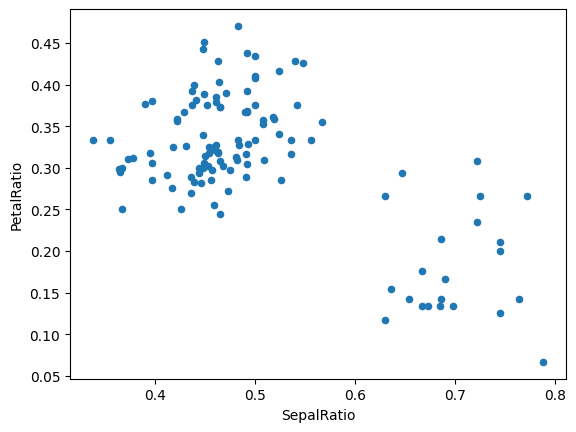

In [87]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for `assign()` is simply `**kwargs`. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the `DataFrame`. A copy of the original `DataFrame` is returned, with the new values inserted.

The order of `**kwargs` is preserved. This allows for dependent assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same `assign()`.

In [88]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [89]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, `x['C']` will refer to the newly created column, that’s equal to `dfa['A'] + dfa['B']`.

#### Indexing / selection

The basics of indexing are as follows:

|Operation                     |Syntax         |Result   |
|:-------                      |:-----         |:-----   |
|Select column                 |`df[col]`      |Series   |
|Select row by label           |`df.loc[label]`|Series   |
|Select row by integer location|`df.iloc[loc]` |Series   |
|Slice rows                    |`df[5:10] `    |DataFrame|
|Select rows by boolean vector |`df[bool_vec]` |DataFrame|

Row selection, for example, returns a `Series` whose index is the columns of the `DataFrame`:

In [90]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [91]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

#### Data alignment and arithmetic

Data alignment between `DataFrame` objects automatically align on **both the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

In [92]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [93]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [94]:
df + df2

,A,B,C,D
0,-1.430051,0.959981,-0.347505,NaN
1,-0.989663,-1.250268,-1.137421,NaN
2,-0.490168,1.814300,1.842483,NaN
3,2.097567,-1.332594,2.442575,NaN
4,-1.306549,-1.384711,-1.596219,NaN
5,2.060642,-0.264735,-2.717658,NaN
6,0.610893,0.644711,0.395535,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between `DataFrame` and `Series`, the default behavior is to align the `Series` **index** on the `DataFrame` **columns**, thus broadcasting row-wise. For example:

In [95]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.252233,-1.020427,-0.282224,1.505458
2,-1.481478,-0.601330,2.178035,0.099073
3,0.169844,-0.971726,1.176916,-0.656565
4,-1.197509,-0.795760,0.483247,-0.122693
5,0.265489,-0.131411,0.340668,-0.870143
6,-0.187865,-0.236581,0.811215,1.174148
7,1.848791,1.770981,2.793541,1.703683
8,-0.827074,-0.213544,2.412856,0.420321
9,-1.222501,-0.375255,0.830822,-0.524045


Arithmetic operations with scalars operate element-wise:

In [96]:
df * 5 + 2

,A,B,C,D
0,3.006538,3.505141,-3.062647,0.303392
1,1.745372,-1.596994,-4.473769,7.830684
2,-4.400851,0.498490,7.827530,0.798757
3,3.855757,-1.353492,2.821930,-2.979435
4,-2.981006,-0.473658,-0.646410,-0.310072
5,4.333984,2.848085,-1.359308,-4.047321
6,2.067212,2.322235,0.993429,6.174134
7,12.250492,12.360045,10.905056,8.821808
8,-1.128835,2.437420,9.001634,2.404995
9,-3.105965,1.628863,1.091462,-2.316832


In [97]:
1 / df

,A,B,C,D
0,4.967523,3.321949,-0.987626,-2.947057
1,-19.636528,-1.390050,-0.772348,0.857532
2,-0.781146,-3.329980,0.857996,-4.162354
3,2.694318,-1.490983,6.083240,-1.004130
4,-1.003813,-2.021298,-1.889352,-2.164435
5,2.142260,5.895638,-1.488402,-0.826812
6,74.391102,15.516615,-4.967360,1.197853
7,0.487781,0.482623,0.561479,0.732943
8,-1.598039,11.430670,0.714119,12.345826
9,-0.979247,-13.472126,-5.503347,-1.158257


In [98]:
df ** 4

,A,B,C,D
0,1.642254e-03,0.008212,1.051067,0.013257
1,6.725758e-06,0.267842,2.810275,1.849260
2,2.685782e+00,0.008133,1.845263,0.003332
3,1.897599e-02,0.202353,0.000730,0.983649
4,9.848915e-01,0.059907,0.078478,0.045564
5,4.748011e-02,0.000828,0.203760,2.139795
6,3.265247e-08,0.000017,0.001642,0.485719
7,1.766440e+01,18.431753,10.061589,3.465118
8,1.533382e-01,0.000059,3.845187,0.000043
9,1.087505e+00,0.000030,0.001090,0.555624


Boolean operators operate element-wise as well:

In [99]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

In [100]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [101]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [102]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [103]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [104]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


#### Transposing

To transpose, access the `T` attribute or `DataFrame.transpose()`, similar to an ndarray:

In [105]:
df[:5].T

,0,1,2,3,4
A,0.201308,-0.050926,-1.280170,0.371151,-0.996201
B,0.301028,-0.719399,-0.300302,-0.670698,-0.494732
C,-1.012529,-1.294754,1.165506,0.164386,-0.529282
D,-0.339322,1.166137,-0.240249,-0.995887,-0.462014


#### DataFrame interoperability with NumPy functions

Most NumPy functions can be called directly on `Series` and `DataFrame`.

In [106]:
np.exp(df)

,A,B,C,D
0,1.223001,1.351247,0.363299,0.712253
1,0.950349,0.487045,0.273965,3.209569
2,0.277990,0.740594,3.207546,0.786432
3,1.449402,0.511351,1.178669,0.369396
4,0.369280,0.609735,0.589028,0.630013
5,1.594877,1.184851,0.510757,0.298357
6,1.013533,1.066569,0.817655,2.304415
7,7.768665,7.940761,5.935856,3.913224
8,0.534851,1.091425,4.056525,1.084370
9,0.360165,0.928461,0.833845,0.421740


In [107]:
np.asarray(df)

array([[ 0.20130756,  0.30102811, -1.01252942, -0.33932153],
       [-0.0509255 , -0.71939878, -1.29475378,  1.1661368 ],
       [-1.28017018, -0.30030207,  1.16550608, -0.24024865],
       [ 0.37115139, -0.67069831,  0.16438609, -0.99588699],
       [-0.99620129, -0.49473163, -0.5292821 , -0.46201443],
       [ 0.46679685,  0.16961694, -0.67186165, -1.20946426],
       [ 0.01344247,  0.06444705, -0.20131418,  0.83482673],
       [ 2.05009835,  2.0720091 ,  1.78101117,  1.36436167],
       [-0.6257669 ,  0.08748394,  1.40032671,  0.08099903],
       [-1.02119306, -0.07422733, -0.1817076 , -0.86336645]])

`DataFrame` is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

`Series` implements `__array_ufunc__`, which allows it to work with NumPy’s **universal functions**.

The ufunc is applied to the underlying array in a `Series`.

In [108]:
ser = pd.Series([1, 2, 3, 4])

In [109]:
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using `numpy.remainder()` on two `Series` with differently ordered labels will align before the operation.

In [110]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])

In [111]:
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

In [112]:
ser1

a    1
b    2
c    3
dtype: int64

In [113]:
ser2

b    1
a    3
c    5
dtype: int64

In [114]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [115]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])

In [116]:
ser3

b    2
c    4
d    6
dtype: int64

In [117]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a `Series` and `Index`, the `Series` implementation takes precedence and a `Series` is returned.

In [118]:
ser = pd.Series([1, 2, 3])

In [119]:
idx = pd.Index([4, 5, 6])

In [120]:
np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

#### Console display

A very large `DataFrame` will be truncated to display them in the console. You can also get a summary using `info()`.

In [121]:
baseball = pd.read_csv("../../assets/data/baseball.csv")

In [122]:
print(baseball)

       id     player  year  stint team  lg    g   ab   r    h  ...   rbi   sb  \
0   88641  womacto01  2006      2  CHN  NL   19   50   6   14  ...   2.0  1.0   
1   88643  schilcu01  2006      1  BOS  AL   31    2   0    1  ...   0.0  0.0   
2   88645  myersmi01  2006      1  NYA  AL   62    0   0    0  ...   0.0  0.0   
3   88649  helliri01  2006      1  MIL  NL   20    3   0    0  ...   0.0  0.0   
4   88650  johnsra05  2006      1  NYA  AL   33    6   0    1  ...   0.0  0.0   
..    ...        ...   ...    ...  ...  ..  ...  ...  ..  ...  ...   ...  ...   
95  89525  benitar01  2007      2  FLO  NL   34    0   0    0  ...   0.0  0.0   
96  89526  benitar01  2007      1  SFN  NL   19    0   0    0  ...   0.0  0.0   
97  89530  ausmubr01  2007      1  HOU  NL  117  349  38   82  ...  25.0  6.0   
98  89533   aloumo01  2007      1  NYN  NL   87  328  51  112  ...  49.0  3.0   
99  89534  alomasa02  2007      1  NYN  NL    8   22   1    3  ...   0.0  0.0   

     cs  bb    so  ibb  hbp

In [123]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   player  100 non-null    object 
 2   year    100 non-null    int64  
 3   stint   100 non-null    int64  
 4   team    100 non-null    object 
 5   lg      100 non-null    object 
 6   g       100 non-null    int64  
 7   ab      100 non-null    int64  
 8   r       100 non-null    int64  
 9   h       100 non-null    int64  
 10  X2b     100 non-null    int64  
 11  X3b     100 non-null    int64  
 12  hr      100 non-null    int64  
 13  rbi     100 non-null    float64
 14  sb      100 non-null    float64
 15  cs      100 non-null    float64
 16  bb      100 non-null    int64  
 17  so      100 non-null    float64
 18  ibb     100 non-null    float64
 19  hbp     100 non-null    float64
 20  sh      100 non-null    float64
 21  sf      100 non-null    float64
 22  gid

However, using `DataFrame.to_string()` will return a string representation of the `DataFrame` in tabular form, though it won’t always fit the console width:

In [124]:
print(baseball.iloc[-20:, :12].to_string())

       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b
80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0
81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0
82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2
83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0
84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0
85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0
86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0
87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1
88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0
89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0
90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0
91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0
92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40   

Wide DataFrames will be printed across multiple rows by default:

In [125]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.465074,1.304812,-1.005201,-0.385594,-0.108840,0.766078,0.786016,0.592349,-0.756497,-0.045918,-0.000079,-1.322077
1,-0.116385,-0.541904,0.168932,0.417464,-0.670684,0.064174,1.307211,-0.838856,-0.092573,-0.324874,-0.081498,1.396496
2,-0.138214,-0.245726,-1.046200,-0.981460,-0.502404,0.853655,-0.047243,1.745903,0.679147,2.111335,0.548919,-1.015115


You can change how much to print on a single row by setting the `display.width` option:

In [126]:
pd.set_option("display.width", 40)  # default is 80

In [127]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.964547,0.194604,1.098314,0.596386,0.730623,1.312923,0.801016,-0.630698,-1.439935,0.512264,-0.109582,-2.058777
1,-0.182065,0.098290,1.960366,0.929271,0.989266,-2.593539,-0.402916,-0.433823,0.706165,-0.975517,-0.371653,0.029736
2,-0.736382,0.723077,0.365445,-0.202673,-0.198194,-0.576533,-1.567555,-0.150128,0.049674,0.379104,0.417103,1.301580


You can adjust the max width of the individual columns by setting `display.max_colwidth`:

In [128]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02",
    ],
}

In [129]:
pd.set_option("display.max_colwidth", 30)

In [130]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [131]:
pd.set_option("display.max_colwidth", 100)

In [132]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


You can also disable this feature via the `expand_frame_repr` option. This will print the table in one block.

## Further resources

In this chapter, we've covered many of the basics of using Pandas effectively for data analysis. Still, much has been omitted from our discussion. To learn more about Pandas, we recommend the following resources:

- [Pandas online documentation](http://pandas.pydata.org/): This is the go-to source for complete documentation of the package. While the examples in the documentation tend to be small generated datasets, the description of the options is complete and generally very useful for understanding the use of various functions.

- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) Written by Wes McKinney (the original creator of Pandas), this book contains much more detail on the Pandas package than we had room for in this chapter. In particular, he takes a deep dive into tools for time series, which were his bread and butter as a financial consultant. The book also has many entertaining examples of applying Pandas to gain insight from real-world datasets. Keep in mind, though, that the book is now several years old, and the Pandas package has quite a few new features that this book does not cover (but be on the lookout for a new edition in 2017).

- [Stack Overflow](http://stackoverflow.com/questions/tagged/pandas): Pandas has so many users that any question you have has likely been asked and answered on Stack Overflow. Using Pandas is a case where some Google-Fu is your best friend. Simply go to your favorite search engine and type in the question, problem, or error you're coming across–more than likely you'll find your answer on a Stack Overflow page.

- [Pandas on PyVideo](http://pyvideo.org/search?q=pandas): From PyCon to SciPy to PyData, many conferences have featured tutorials from Pandas developers and power users. The PyCon tutorials in particular tend to be given by very well-vetted presenters.

Using these resources, combined with the walk-through given in this chapter, my hope is that you'll be poised to use Pandas to tackle any data analysis problem you come across!

## Your turn! 🚀

### Processing image data

Recently, very powerful AI models have been developed that allow us to understand images. There are many tasks that can be solved using pre-trained neural networks, or cloud services. Some examples include:

- **Image Classification**, which can help you categorize the image into one of the pre-defined classes. You can easily train your own image classifiers using services such as [Custom Vision](https://azure.microsoft.com/services/cognitive-services/custom-vision-service/?WT.mc_id=academic-77958-bethanycheum)
- **Object Detection** to detect different objects in the image. Services such as [computer vision](https://azure.microsoft.com/services/cognitive-services/computer-vision/?WT.mc_id=academic-77958-bethanycheum) can detect a number of common objects, and you can train [Custom Vision](https://azure.microsoft.com/services/cognitive-services/custom-vision-service/?WT.mc_id=academic-77958-bethanycheum) model to detect some specific objects of interest.
- **Face Detection**, including Age, Gender and Emotion detection. This can be done via [Face API](https://azure.microsoft.com/services/cognitive-services/face/?WT.mc_id=academic-77958-bethanycheum).

All those cloud services can be called using [Python SDKs](https://docs.microsoft.com/samples/azure-samples/cognitive-services-python-sdk-samples/cognitive-services-python-sdk-samples/?WT.mc_id=academic-77958-bethanycheum), and thus can be easily incorporated into your data exploration workflow.

Here are some examples of exploring data from Image data sources:

- In the blog post [How to Learn Data Science without Coding](https://soshnikov.com/azure/how-to-learn-data-science-without-coding/) we explore Instagram photos, trying to understand what makes people give more likes to a photo. We first extract as much information from pictures as possible using [computer vision](https://azure.microsoft.com/services/cognitive-services/computer-vision/?WT.mc_id=academic-77958-bethanycheum), and then use [Azure Machine Learning AutoML](https://docs.microsoft.com/azure/machine-learning/concept-automated-ml/?WT.mc_id=academic-77958-bethanycheum) to build interpretable model.
- In [Facial Studies Workshop](https://github.com/CloudAdvocacy/FaceStudies) we use [Face API](https://azure.microsoft.com/services/cognitive-services/face/?WT.mc_id=academic-77958-bethanycheum) to extract emotions on people on photographs from events, in order to try to understand what makes people happy.

### Assignment

[Perform more detailed data study for the challenges above](../../assignments/data-science/data-processing-in-python.md)

## Acknowledgments

Thanks for [pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html). It contributes the majority of the content in this chapter.